# Assignment 7: EDA (Team-9) 

## BikeSharing Data


### Introduction:
    
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com


### CSV Files:

hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours

day.csv - bike sharing counts aggregated on daily basis. Records: 731 days





### Data Field Explanation:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	


### Loading the Dataset:

In [1]:
import pandas as pd
import numpy as np

df_day = pd.read_csv('day.csv')
df_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [2]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

### Description for the Dataset:
#### 1. Day.csv

In [3]:
df_day.shape

(731, 16)

In [4]:
print(df_day.keys())

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_day.describe(include='all')

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2012-02-20         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

#### 2. Hour.csv

In [7]:
df_hour.shape

(17379, 17)

In [8]:
print(df_hour.keys())

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [9]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
df_hour.describe(include='all')

instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2012-05-12           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       11.546752      0.028770      3.003683      0.682721      1.425283   
std         6.914405      0.167165      2.005771      0.465431      0.639357   
min         0.000000      0.000000      0.000000      0.000000      1.000000   
25%         6.000000      0.000000      1.000000      0.000000      1.000000   
50%        12.000000      0.000000      3.000000      1.000000      1.000000   
75%        18.000000      0.000000      5.000000      1.000000      2.000000   
max        23.000000      1.000000      6.000000      1.000000      4.000000   

                temp         atemp           hum     windspeed        casual  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.496987      0.475775      0.627229      0.190098     35.676218   
std         0.192556      0.171850      0.192930      0.122340     49.305030   
min         0.020000      0.000000      0.000000      0.000000      0.000000   
25%         0.340000      0.333300      0.480000      0.104500      4.000000   
50%         0.500000      0.484800      0.630000      0.194000     17.000000   
75%         0.660000      0.621200      0.780000      0.253700     48.000000   
max         1.000000      1.000000      1.000000      0.850700    367.000000   

          registered           cnt  
count   17379.000000  17379.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean      153.786869    189.463088  
std       151.357286    181.387599  
min         0.000000      1.000000  
25%        34.000000     40.000000  
50%       115.000000    142.000000  
75%       220.000000    281.000000  
max       886.000000    977.000000

### Counting and Handling the Missing Values:

In [11]:
df_day[df_day.isnull()==True].count()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
df_hour[df_hour.isnull()==True].count()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### So as we notice that there are no missing values so there's no need to handle them.

## Exploratory Data Analysis:

### 1. Univariate Analysis

#### Histogram and KDE

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

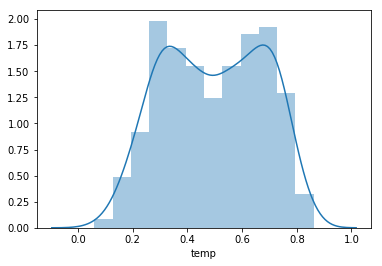

In [14]:
sns.distplot(df_day['temp'])
plt.show()

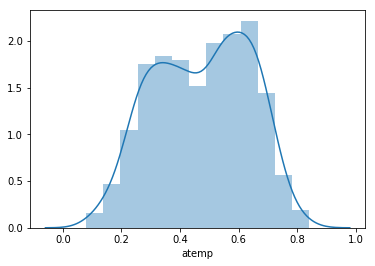

In [15]:
sns.distplot(df_day['atemp'])
plt.show()

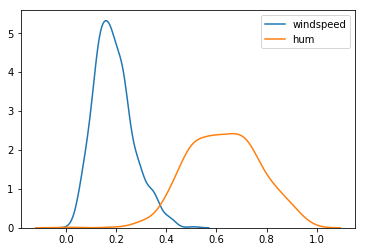

In [16]:
sns.kdeplot(df_day['windspeed'])
sns.kdeplot(df_day['hum'])

plt.show()

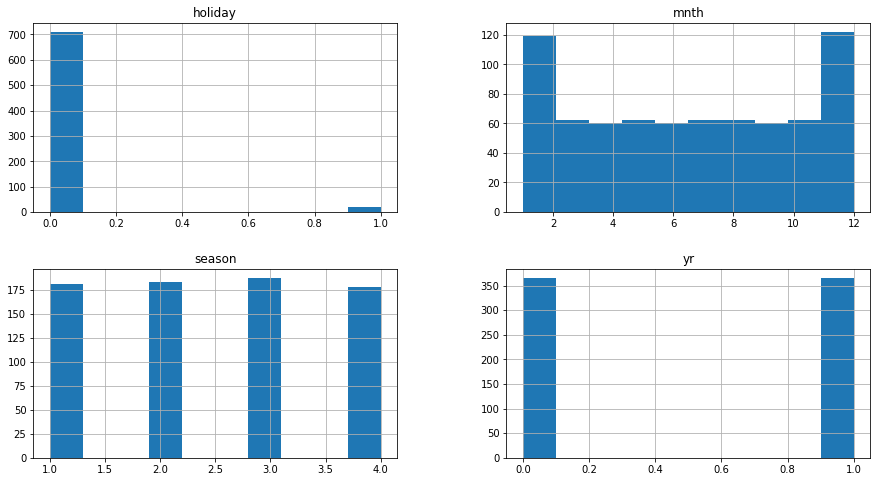

In [17]:
df_day[['season', 'yr','mnth','holiday']].hist(figsize=(15,8))
plt.show()

#### Observation

In the above graphs we see that the temp, atemp, windspeed and humidity are normalised to some extent and we see the histograms for 
1. How many holdays were there 
2. How was the bussiness in every month
3. In the third graph that is of seasons we see that the bookings were same for all the seasons (1:springer, 2:summer, 3:fall,      4:winter)
4. In the fourth graph we see the number of bookings in year 2011 and 2012.

 

### 2. Bivariate Analysis

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


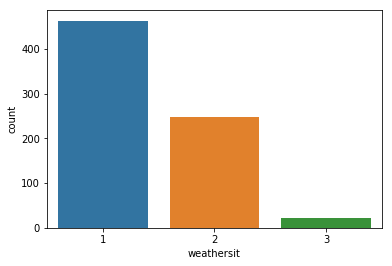

In [18]:
sns.countplot('weathersit',data=df_day)
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


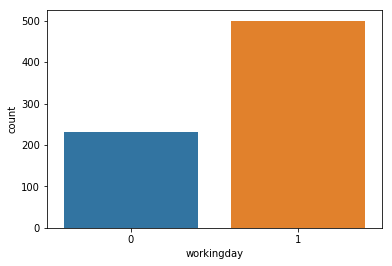

In [19]:
sns.countplot('workingday',data=df_day)
plt.show()


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


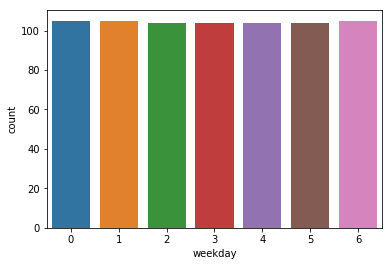

In [20]:
sns.countplot('weekday',data=df_day)
plt.show()

#### Observations:
we see that how the booking is affected by the weather situation (weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
and we also see that there were no bookings on days with heavy rain

In the second graph we notice that bookings are more on working days rather than non-working days and in the third graph we notice that bookings we made on every day of the week.

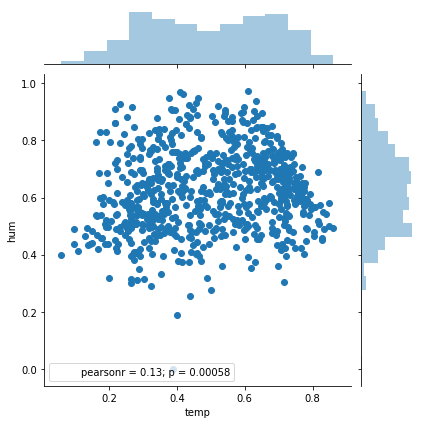

In [21]:
sns.jointplot(x='temp',y='hum',data=df_day)
plt.show()

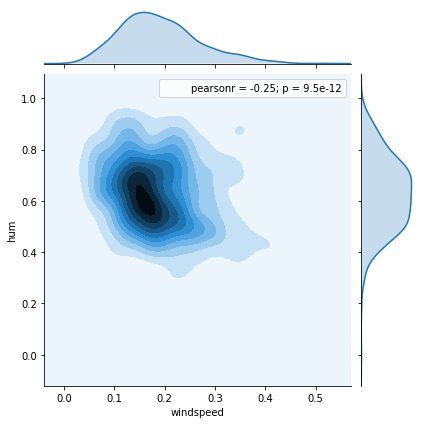

In [22]:
sns.jointplot(x='windspeed',y='hum',data=df_day,kind='kde')
plt.show()

### Observation:
In the above two graphs we see the relation among humidity and temp, humidity and windspeed.

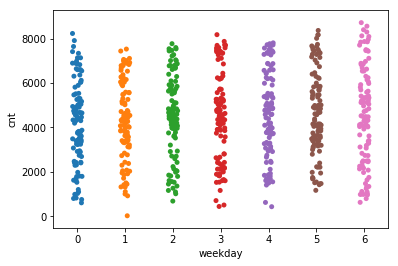

In [24]:
sns.stripplot(x = 'weekday', y='cnt', data=df_day, jitter=True)
plt.show()

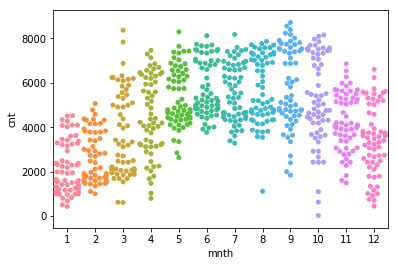

In [23]:
sns.swarmplot(x='mnth',y='cnt',data=df_day)
plt.show()

### 3. Multivariate Analysis 

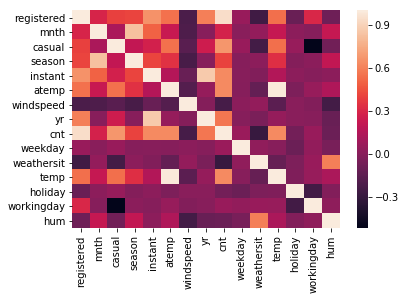

In [31]:
num_features = list(set(df_day.columns)-set(['dteday']))
cor_mat = df_day[num_features].corr()
sns.heatmap(cor_mat)
plt.show()

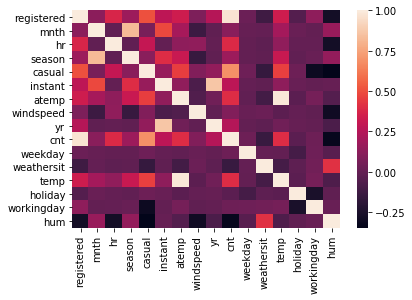

In [33]:
num_features_1 = list(set(df_hour.columns)-set(['dteday']))
cor_mat = df_hour[num_features_1].corr()
sns.heatmap(cor_mat)
plt.show()

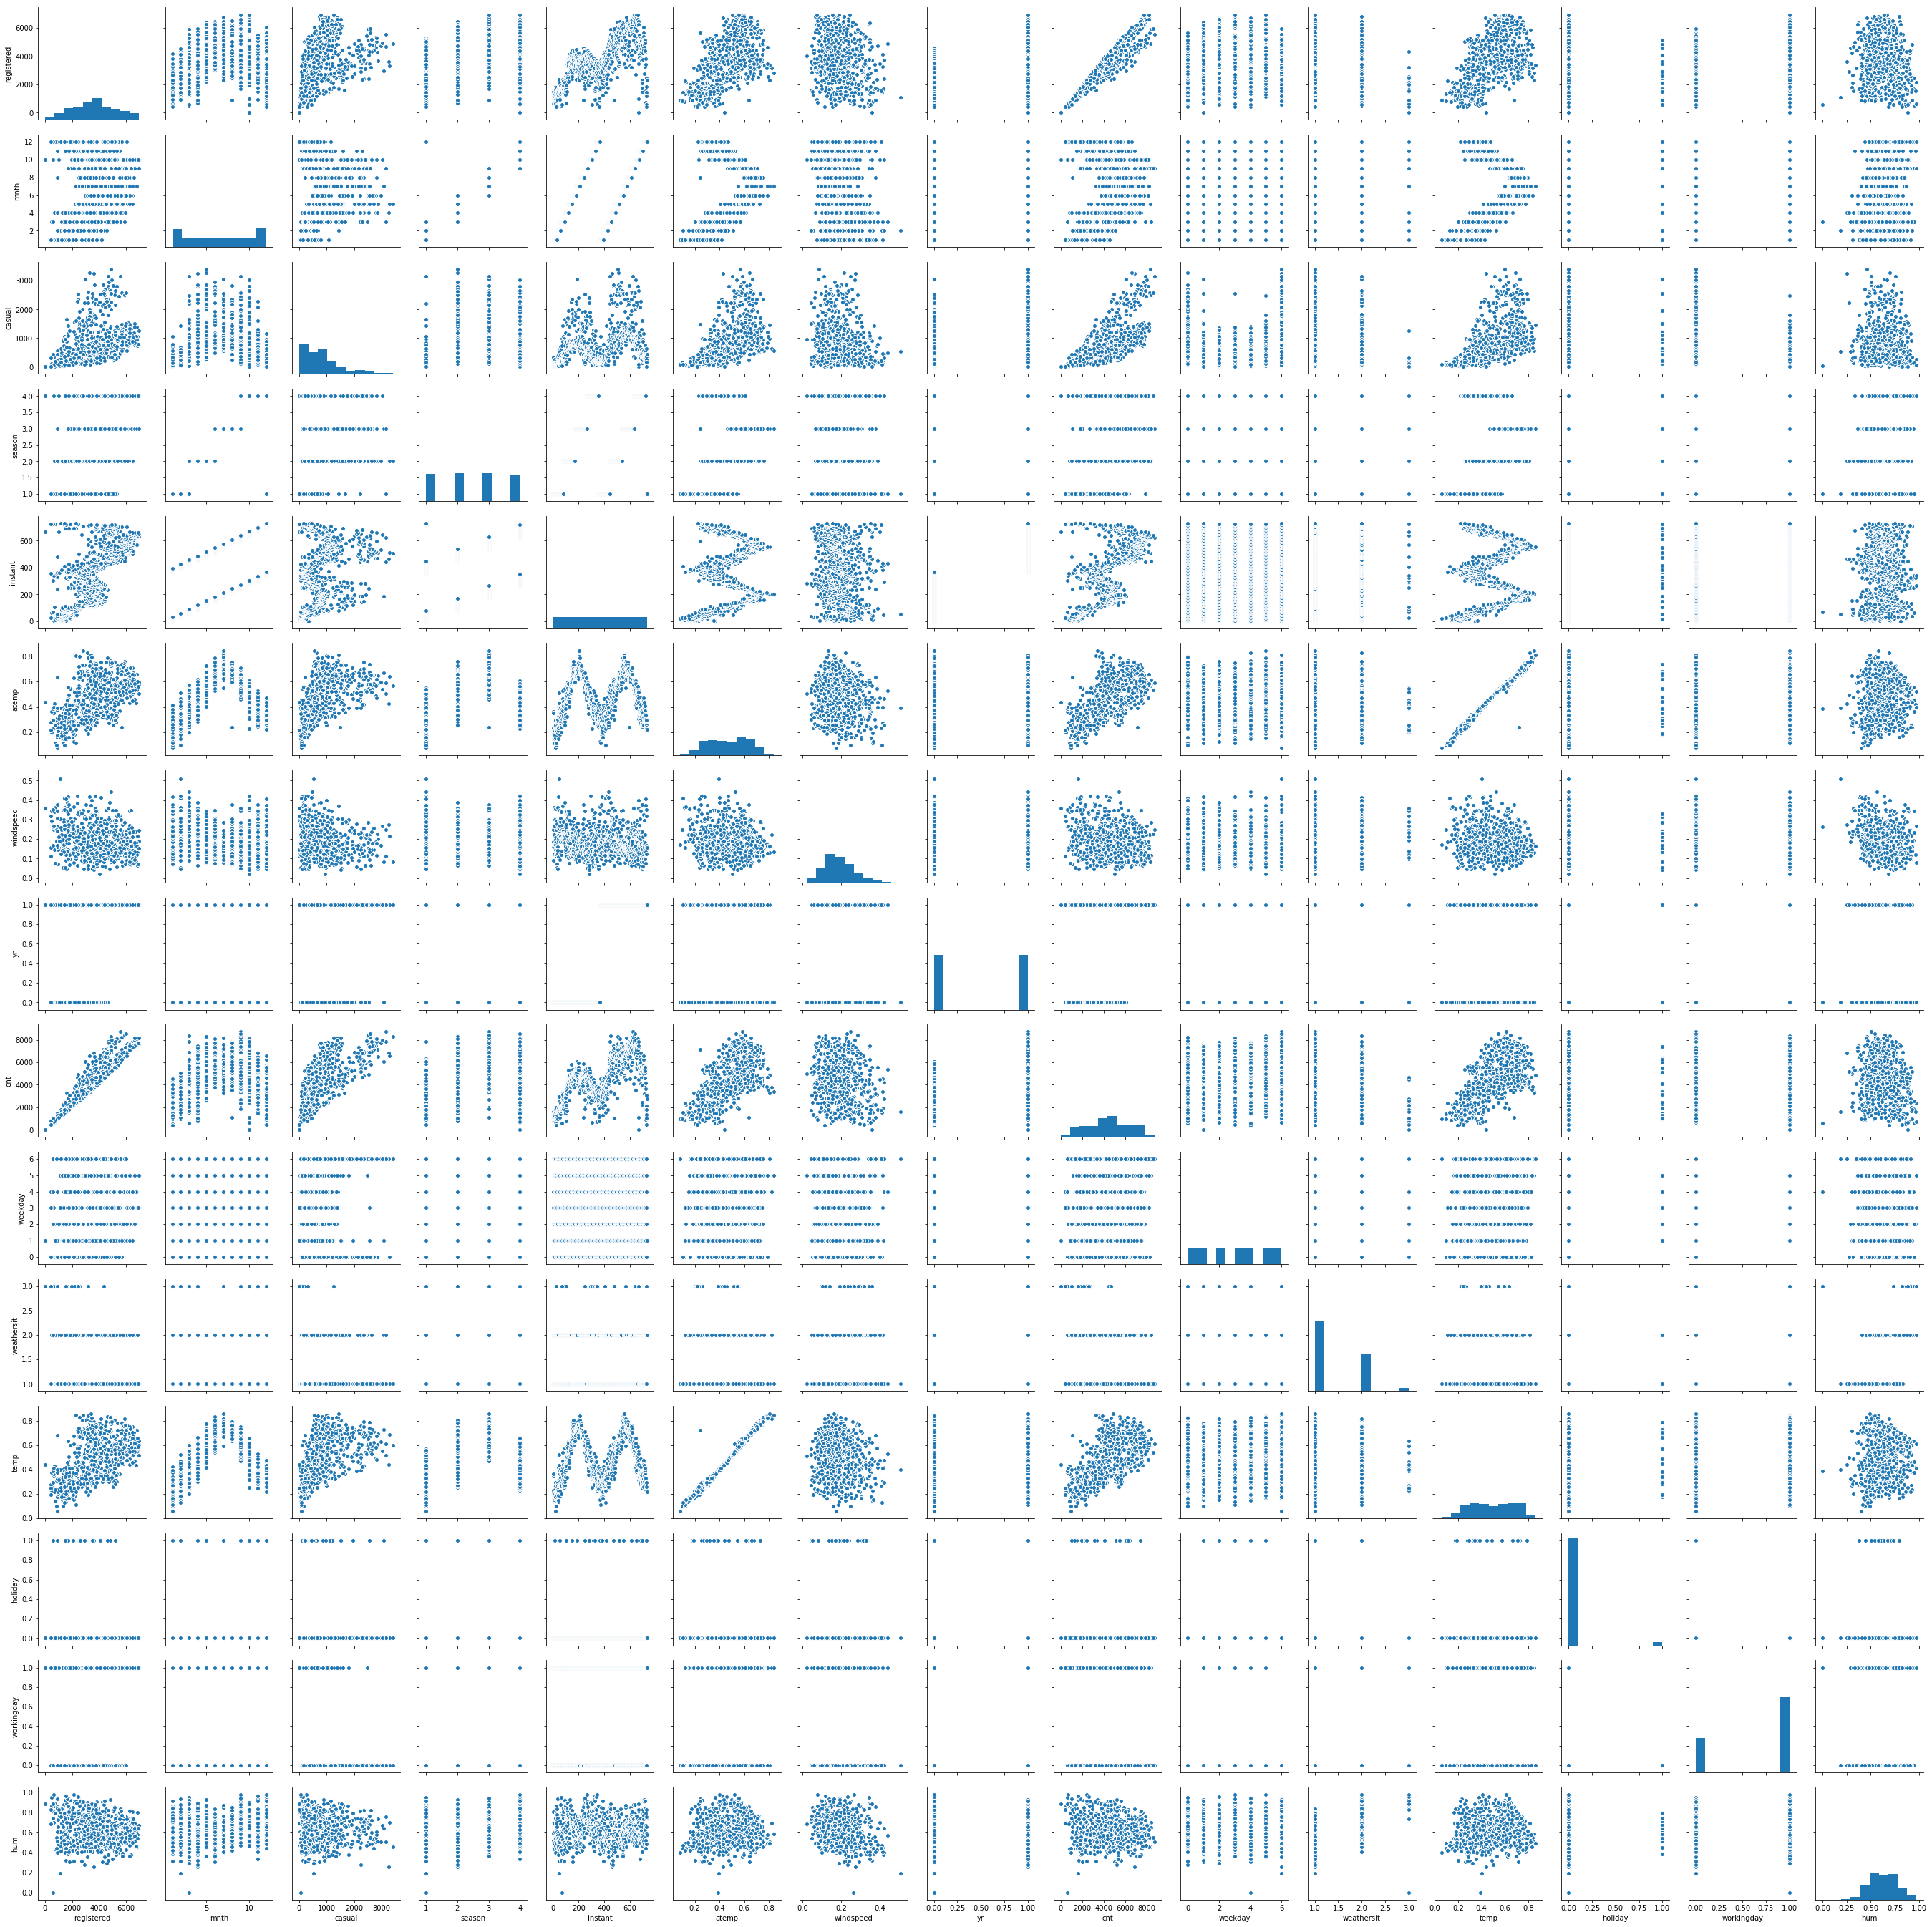

In [34]:
sns.pairplot(df_day[num_features])
plt.show()

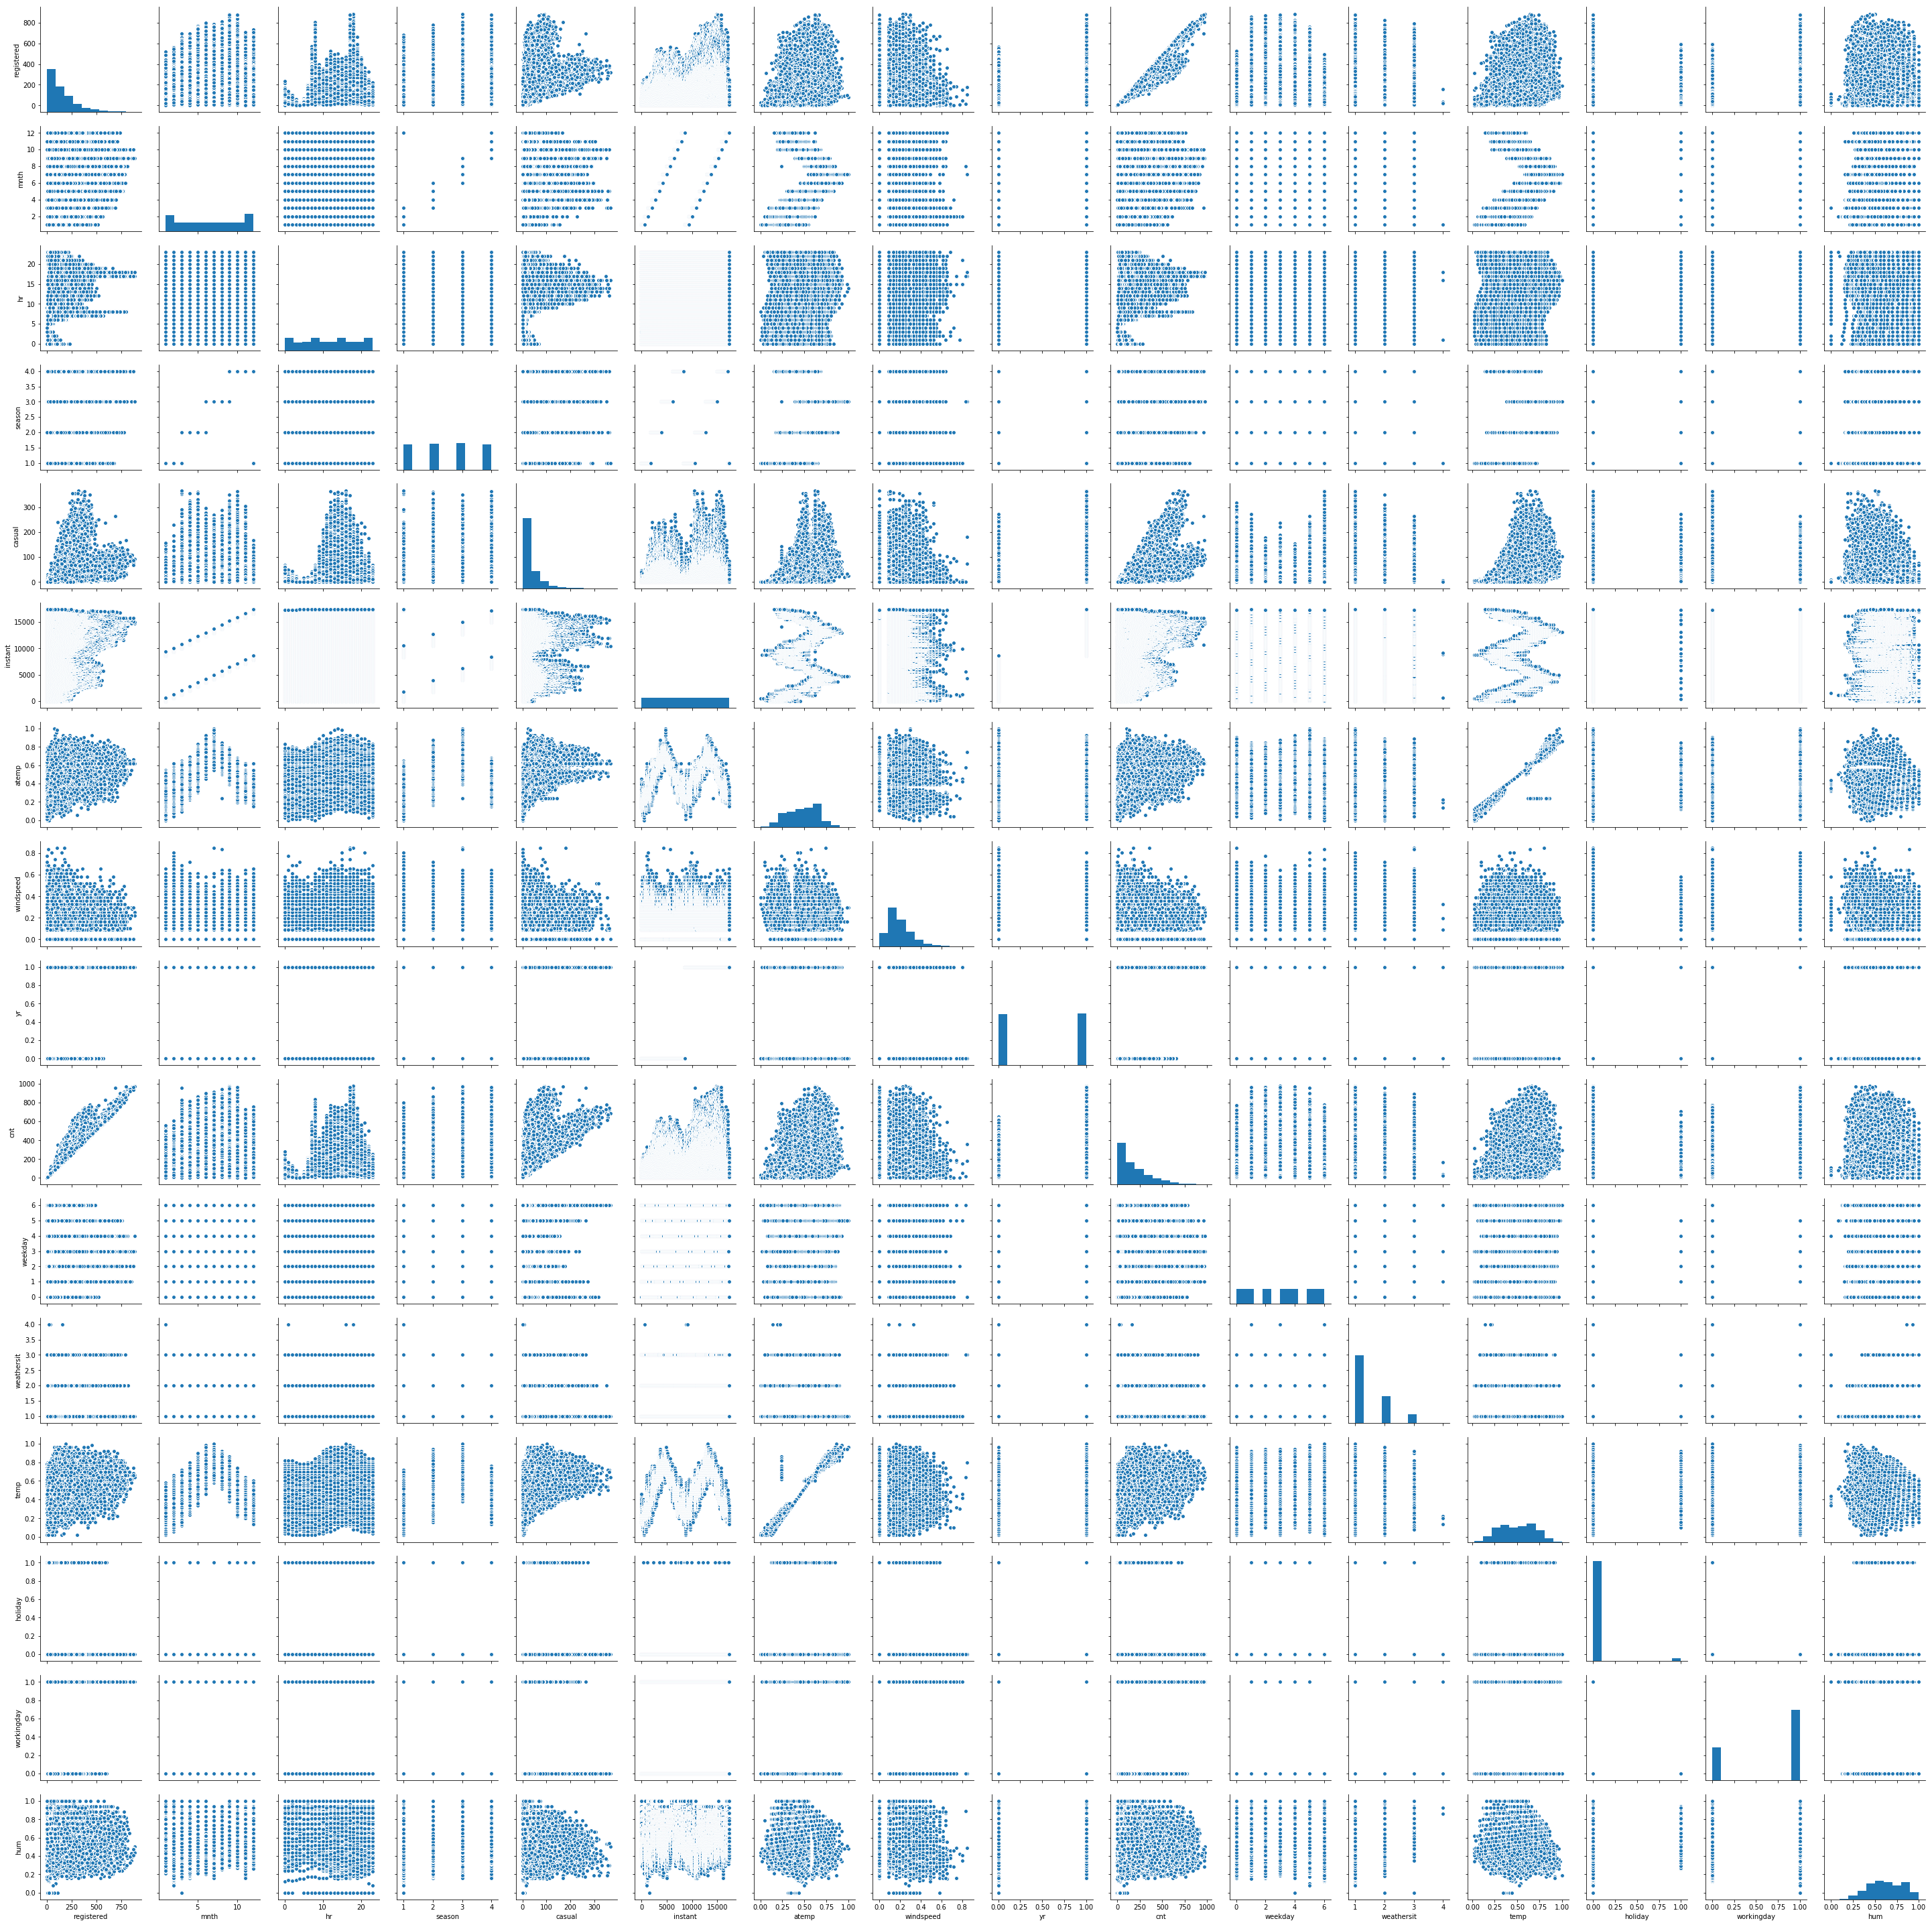

In [35]:
sns.pairplot(df_hour[num_features_1])
plt.show()

## Interresting Plots

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


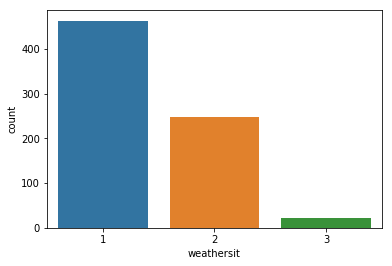

In [36]:
sns.countplot('weathersit',data=df_day)
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


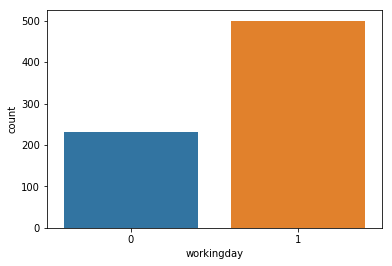

In [37]:
sns.countplot('workingday',data=df_day)
plt.show()

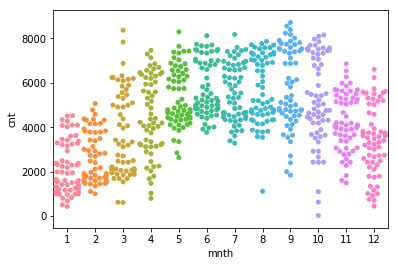

In [38]:
sns.swarmplot(x='mnth',y='cnt',data=df_day)
plt.show()

First two graphs are chosen because the tell us that how the bookings are affected by different seasons and working/non-working days.
Third graph tells us the number of bookings in different months of the year.